Dataset Shape: (1000, 16)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Height_cm                     1000 non-null   int64  
 4   Weight_kg                     1000 non-null   int64  
 5   BMI                           1000 non-null   float64
 6   Daily_Steps                   1000 non-null   int64  
 7   Calories_Intake               1000 non-null   int64  
 8   Hours_of_Sleep                1000 non-null   float64
 9   Heart_Rate                    1000 non-null   int64  
 10  Blood_Pressure                1000 non-null   object 
 11  Exercise_Hours_per_Week       1000 non-null   float64
 12  Smoker                 

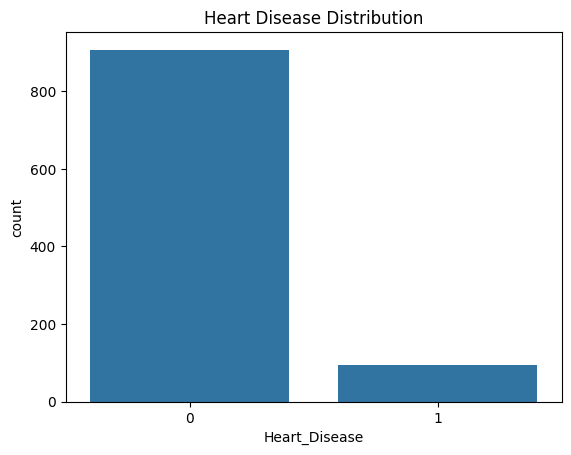

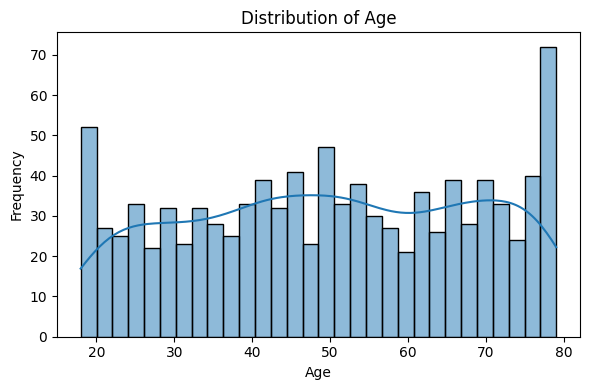

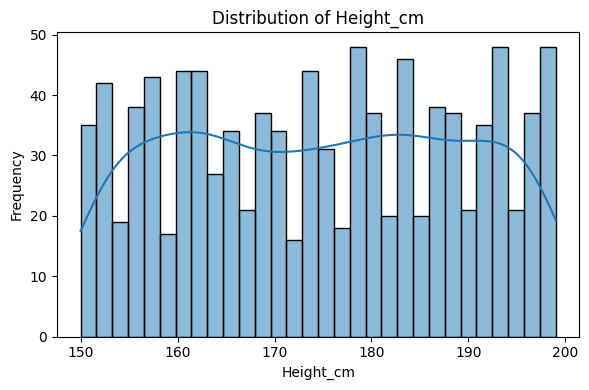

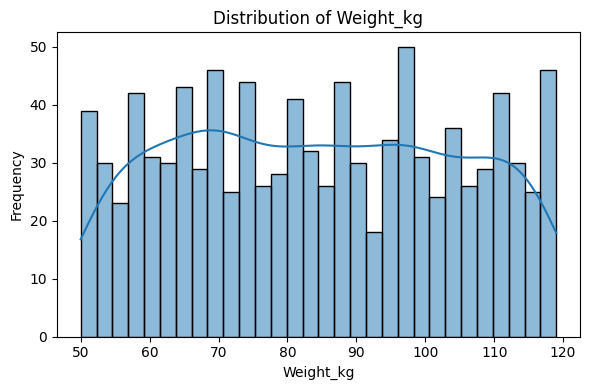

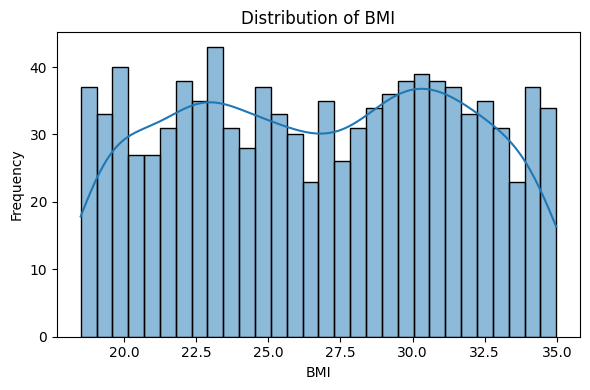

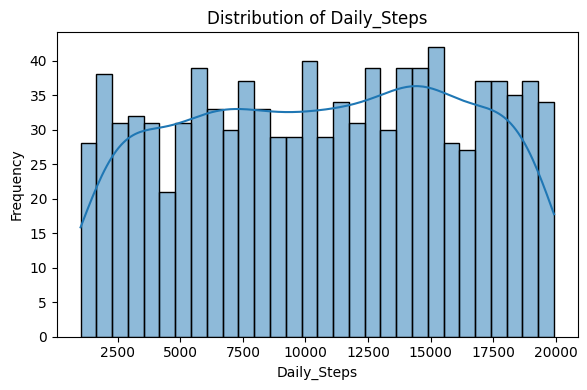

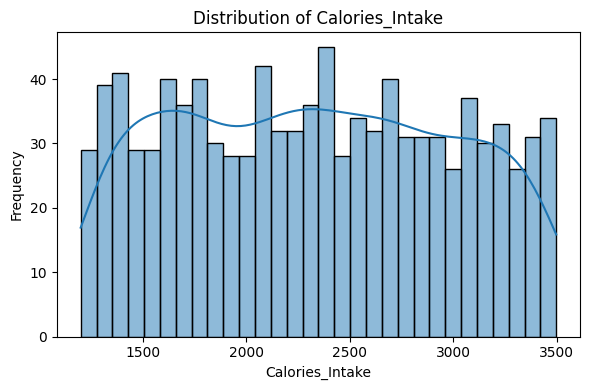

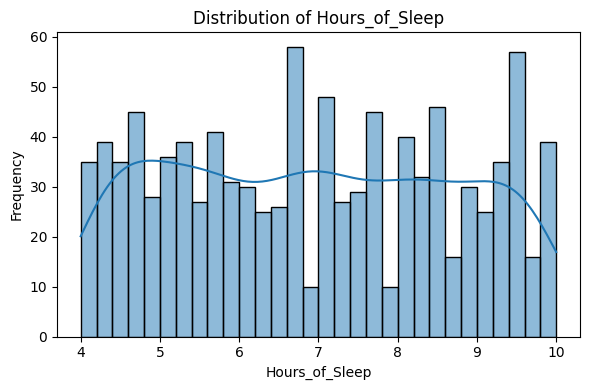

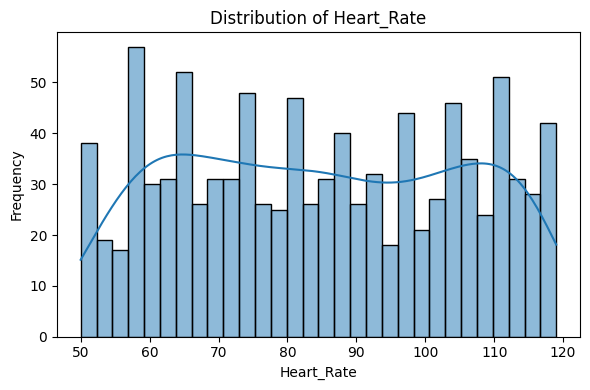

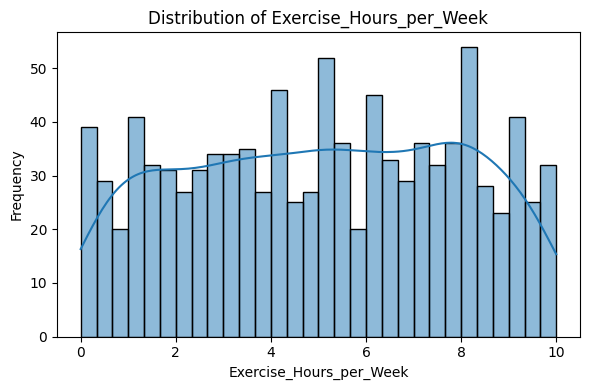

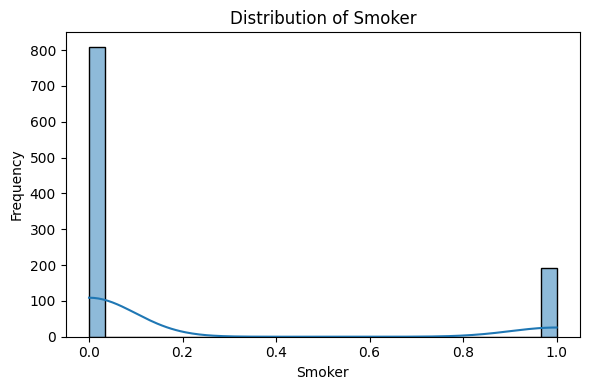

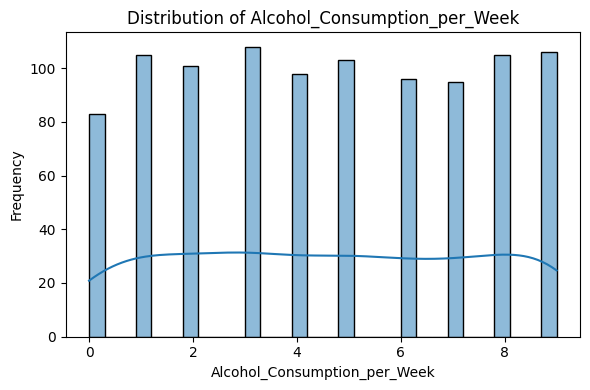

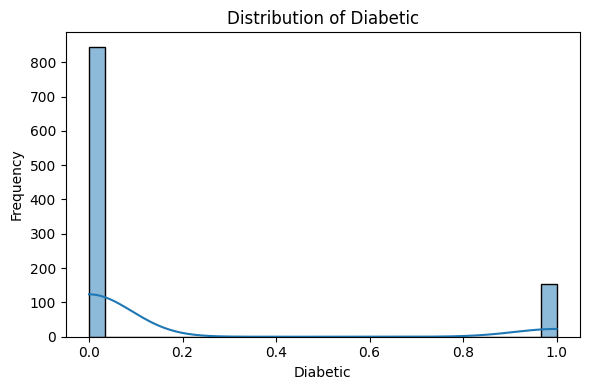

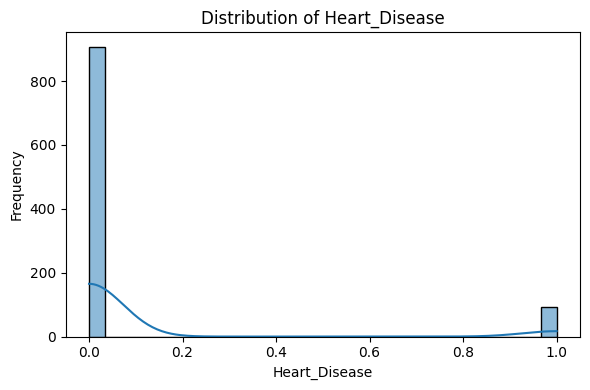

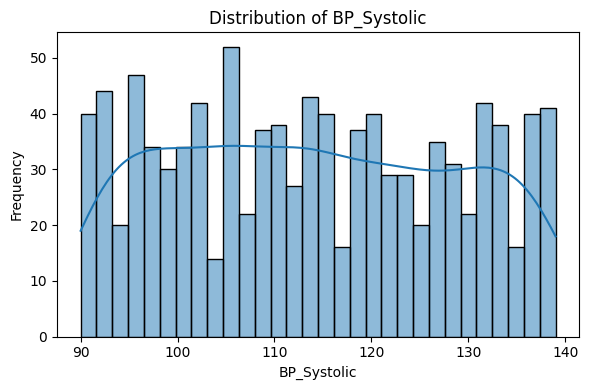

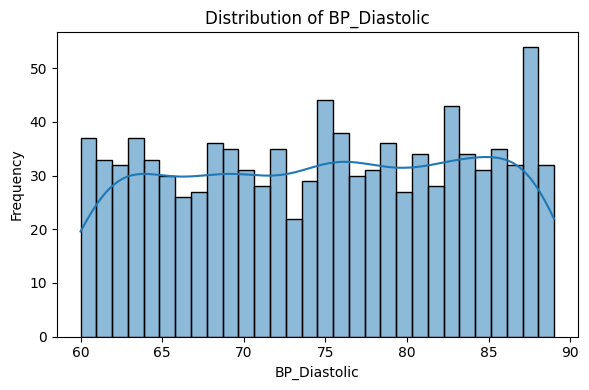

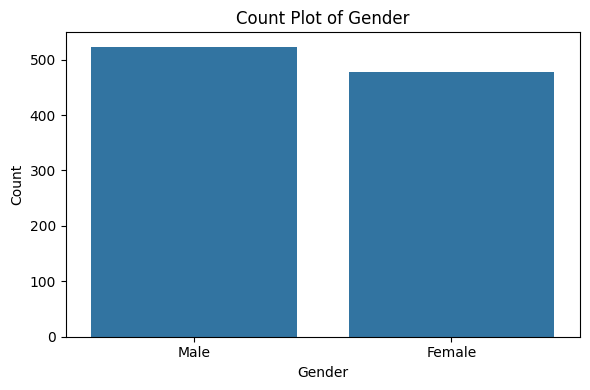

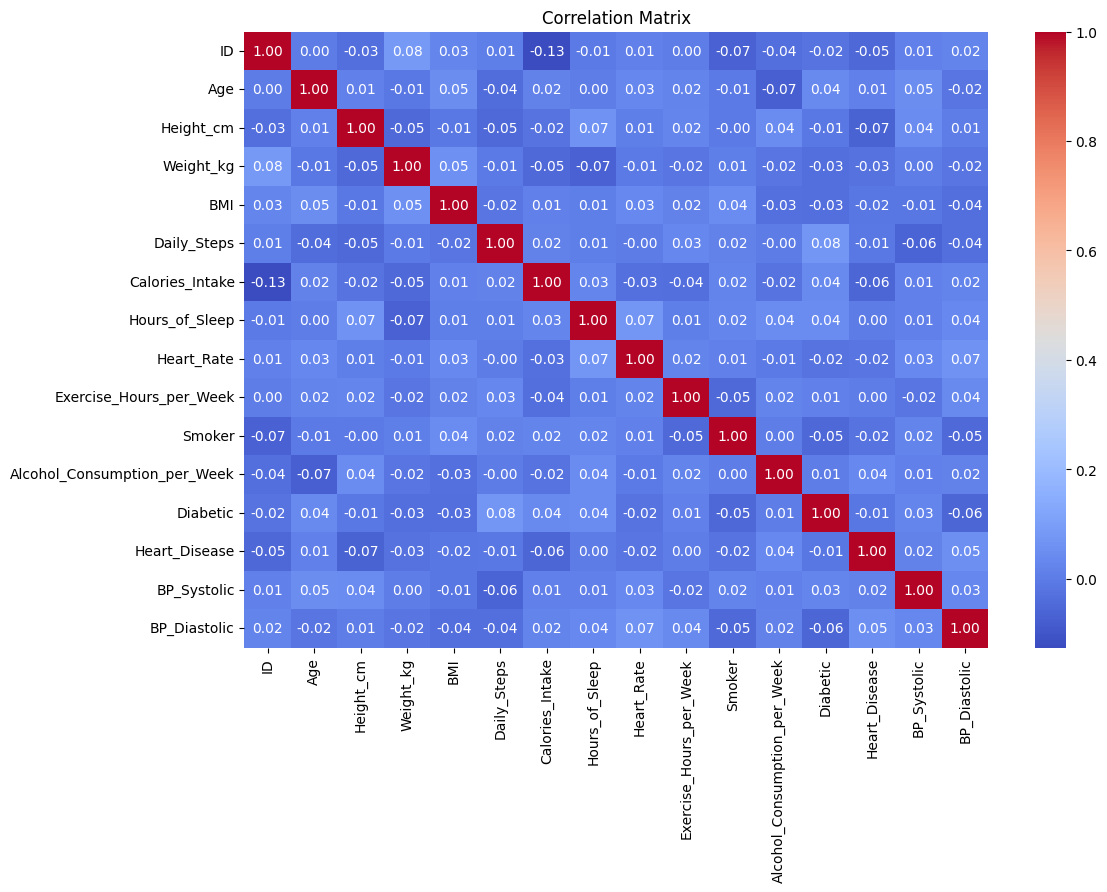

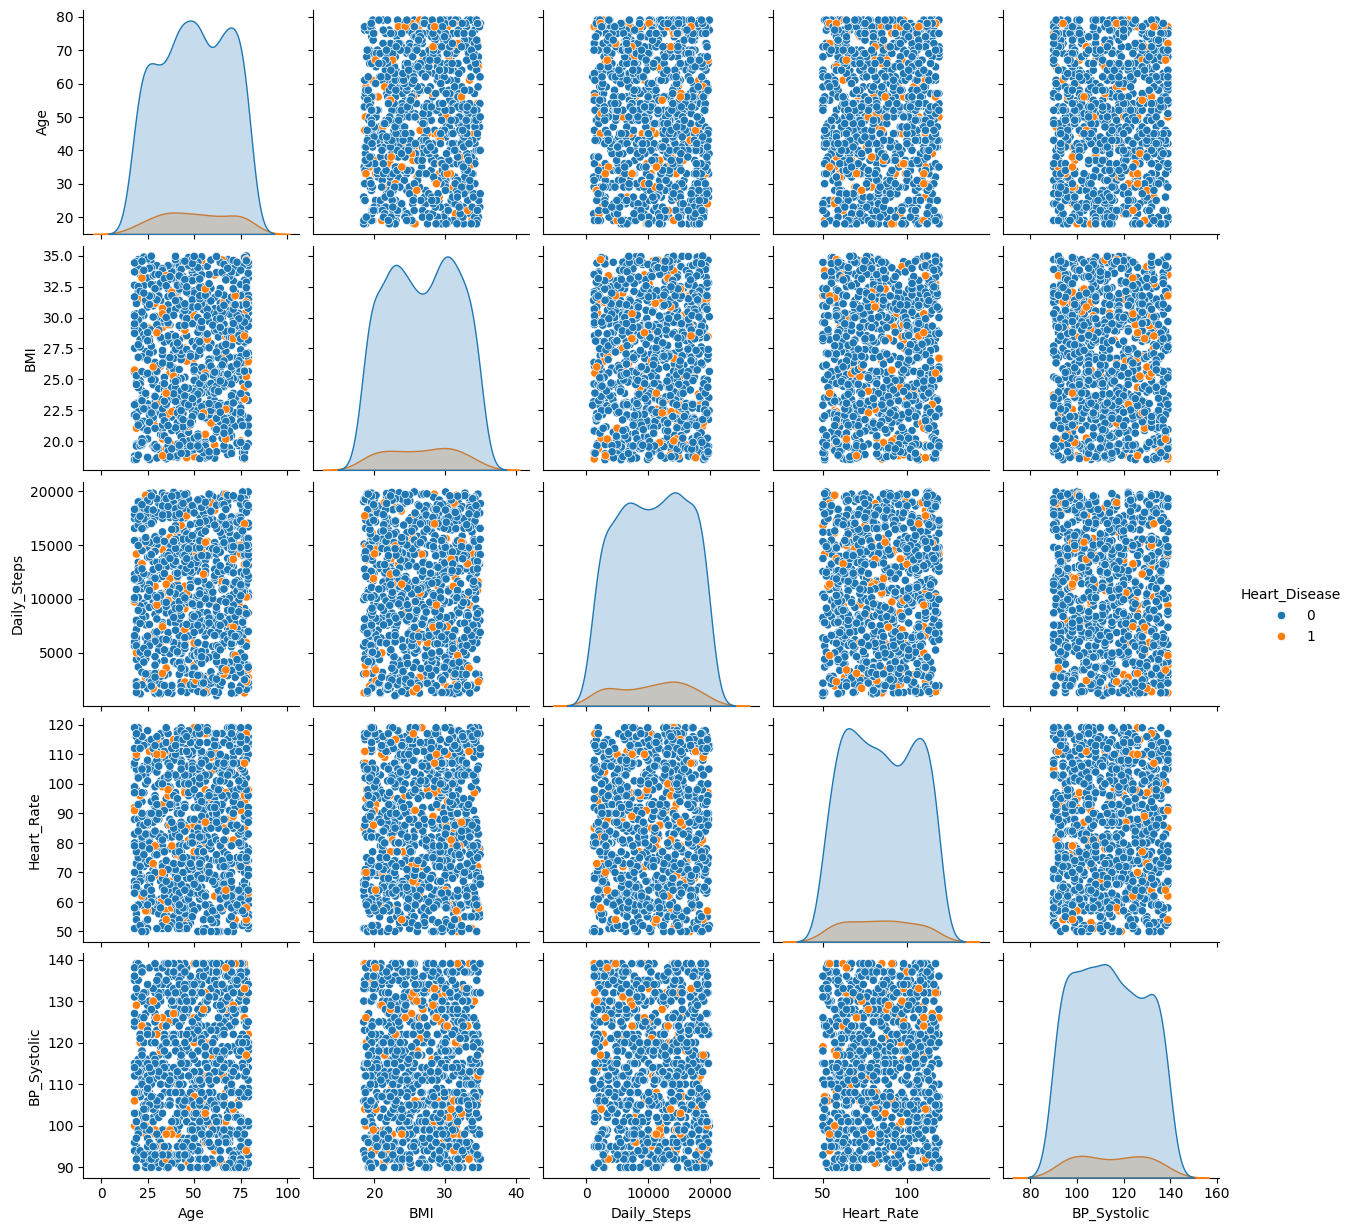

Cleaned data saved to 'cleaned_health_activity_data.csv'


In [2]:
# Credit EDA Project in Python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "health_activity_data.csv"  # Replace with the path to your dataset
df = pd.read_csv(file_path)

# -------------------------
# Basic Info
# -------------------------
print("Dataset Shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe(include='all'))

# -------------------------
# Preprocessing
# -------------------------
# Split Blood Pressure into Systolic and Diastolic
bp_split = df['Blood_Pressure'].str.split('/', expand=True)
df['BP_Systolic'] = pd.to_numeric(bp_split[0], errors='coerce')
df['BP_Diastolic'] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop(columns=['Blood_Pressure'], inplace=True)

# Convert Yes/No to 1/0
binary_cols = ['Smoker', 'Diabetic', 'Heart_Disease']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# -------------------------
# Missing Values Check
# -------------------------
print("\nMissing Values:")
print(df.isnull().sum())

# -------------------------
# Target Distribution
# -------------------------
sns.countplot(x='Heart_Disease', data=df)
plt.title('Heart Disease Distribution')
plt.show()

# -------------------------
# Numeric Feature Distributions
# -------------------------
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('ID')  # Drop ID for plotting

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# -------------------------
# Categorical Feature Analysis
# -------------------------
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# -------------------------
# Correlation Heatmap (Fixed)
# -------------------------
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# -------------------------
# Pairplot for Key Features
# -------------------------
key_features = ['Age', 'BMI', 'Daily_Steps', 'Heart_Rate', 'BP_Systolic', 'Heart_Disease']
sns.pairplot(df[key_features], hue='Heart_Disease')
plt.show()

# -------------------------
# Save Cleaned Data
# -------------------------
df.to_csv("cleaned_health_activity_data.csv", index=False)
print("Cleaned data saved to 'cleaned_health_activity_data.csv'")
